In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar

In [60]:
accidents = pd.read_csv('../data/accidents.csv')
vehicles = pd.read_csv('../data/vehicles.csv', on_bad_lines = 'skip')

accidents_vehicles = accidents.merge(vehicles, how='left', on='Accident_Index')
accidents = accidents_vehicles[accidents_vehicles['Vehicle_Type'] == 9]

In [61]:
accidents_dates = accidents.groupby('Date', as_index=False).size()
accidents_dates = accidents_dates.assign(
    year = list(map(lambda str: str[-4:], accidents_dates['Date'])),
    month = list(map(lambda str: str[-7:-5], accidents_dates['Date']))
)
accidents_dates

,Date,size,year,month
0,01/01/2005,421,2005,01
1,01/01/2006,375,2006,01
2,01/01/2007,463,2007,01
3,01/01/2008,321,2008,01
4,01/01/2009,320,2009,01
...,...,...,...,...
3647,31/12/2010,275,2010,12
3648,31/12/2011,374,2011,12
3649,31/12/2012,349,2012,12
3650,31/12/2013,351,2013,12


In [62]:
data_to_plot = accidents_dates.groupby(['year', 'month'], as_index = False).sum('size')
data_to_plot

,year,month,size
0,2005,01,23191
1,2005,02,20506
2,2005,03,20763
3,2005,04,21563
4,2005,05,23195
...,...,...,...
115,2014,08,15610
116,2014,09,14600
117,2014,10,17331
118,2014,11,17508


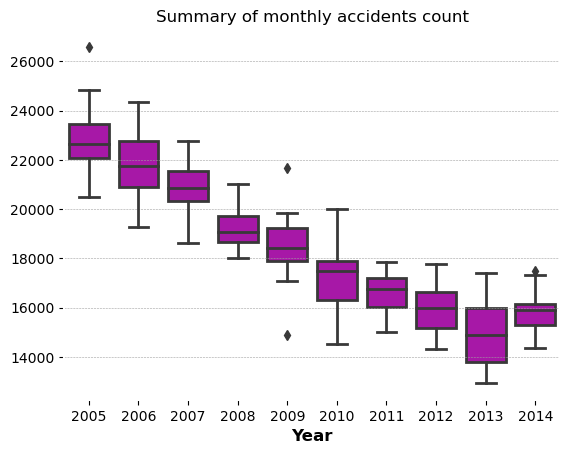

In [63]:
ax = sns.boxplot(x='year', y='size', data=data_to_plot, color='m')
ax.set(xlabel = 'Year', ylabel= '', title = 'Summary of monthly accidents count')
ax.figure.savefig('../plots/accidents_timeline_annual.jpeg')

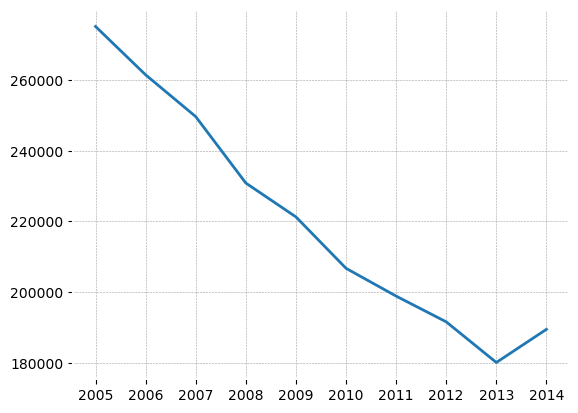

In [64]:
plot_1_data = accidents_dates.groupby('year', as_index = False).sum('size')
plt.plot(plot_1_data['year'], plot_1_data['size'])
plt.show()

plt.close()

In [65]:
plt.close()
plot_2_data_2009 = accidents_dates[accidents_dates['year'] == '2009']
plot_2_data_2009 = plot_2_data_2009.groupby('month', as_index = False).sum('size')
#plt.plot(plot_2_data['month'], plot_2_data['size'], label = '2007')
plot_2_data_2008 = accidents_dates[accidents_dates['year'] == '2008']
plot_2_data_2008 = plot_2_data_2008.groupby('month', as_index = False).sum('size')

#plot_2_data = plot_2_data_2007.merge(plot_2_data_2007, how = 'left', on='month')

#plt.plot(plot_2_data['month'], plot_2_data['size'], label = '2008')
#plt.legend()

#plt.title('Accidents monthly')
#plt.savefig('../plots/accidents_timeline.jpeg')
# w 2007 byla, a w 2008 nie bylo kampanii THINK!

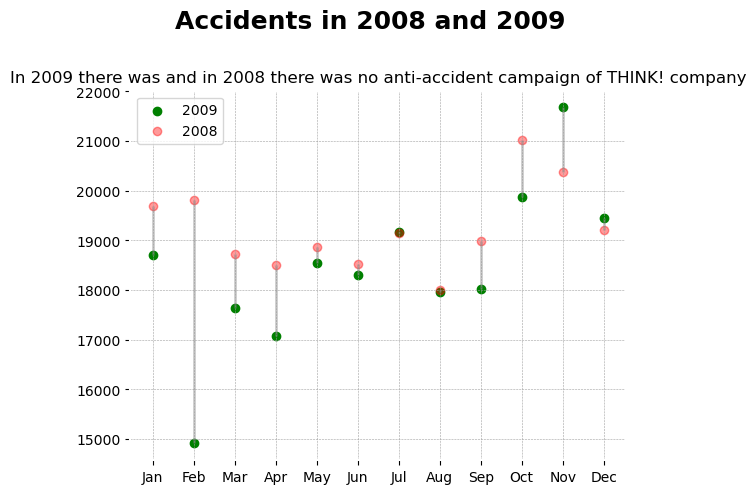

In [66]:
plt.vlines(x = plot_2_data_2008['month'], ymin = plot_2_data_2008['size'], 
           ymax = plot_2_data_2009['size'], color='grey', alpha=0.4)
plt.scatter(plot_2_data_2009.month, plot_2_data_2009['size'], color = 'green', alpha=1, label='2009')
plt.scatter(plot_2_data_2008.month, plot_2_data_2008['size'], color = 'red', alpha=0.4, label='2008')
plt.legend()
plt.xticks(ticks = list(range(12)), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.title('In 2009 there was and in 2008 there was no anti-accident campaign of THINK! company')
plt.suptitle('Accidents in 2008 and 2009', y=1.05, fontsize=18)
plt.show()